# Introduction 😃😃😃

- We have DataSet about ## Online content sharing platform - Engagement score prediction


## Context 🙄🙄🙄

- ABC is an online content sharing platform that enables users to create, upload and share the content in the form of videos. It includes videos from different genres like entertainment, education, sports, technology and so on. The maximum duration of video is 10 minutes.

- Users can like, comment and share the videos on the platform.

- Based on the user’s interaction with the videos, engagement score is assigned to the video with respect to each user. Engagement score defines how engaging the content of the video is.

- Understanding the engagement score of the video improves the user’s interaction with the platform. It defines the type of content that is appealing to the user and engages the larger audience.

## Objective ❤️❤️❤️❤️

- The main objective of the problem is to develop the machine learning approach to predict the engagement score of the video on the user level.

## The columns
[ Row ID , User ID , Category ID , Video ID , Age, Gender, Profession, Followers, Views, Engagement Score ]



# Work plan 🤝🤝🤝🤝🤝

- Analyze and explore data
- Building a Machine Learning Model


# 1- Analyze and Explore DataSet

In [1]:
#Importing the basic librarires fot analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import plotly.graph_objects as go
import plotly.express as px

In [2]:
#Importing the training dataset

df=pd.read_csv("../input/online-content-sharing-platform/Train.csv")

In [3]:
# looking the data set
df.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [4]:
# Drop Row ID , because we don't need it.

df.drop(columns="row_id",inplace=True)

In [5]:
 #print the shape dataset
print("Shape The DataSet ", df.shape )

Shape The DataSet  (89197, 9)


In [6]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89197 entries, 0 to 89196
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           89197 non-null  int64  
 1   category_id       89197 non-null  int64  
 2   video_id          89197 non-null  int64  
 3   age               89197 non-null  int64  
 4   gender            89197 non-null  object 
 5   profession        89197 non-null  object 
 6   followers         89197 non-null  int64  
 7   views             89197 non-null  int64  
 8   engagement_score  89197 non-null  float64
dtypes: float64(1), int64(6), object(2)
memory usage: 6.1+ MB


In [7]:
#checking null value 
df.isna().sum()

user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64

- Inference: No any missing data

In [8]:
# Describe value data set
df.describe().round(2)

,user_id,category_id,video_id,age,followers,views,engagement_score
count,89197.00,89197.00,89197.00,89197.00,89197.00,89197.00,89197.00
mean,13881.91,18.32,77.72,24.85,252.46,502.98,3.49
std,8005.58,11.68,48.47,8.96,46.09,268.57,0.86
min,1.00,1.00,1.00,10.00,160.00,30.00,0.00
25%,6945.00,8.00,34.00,18.00,230.00,229.00,2.90
50%,13892.00,16.00,76.00,23.00,240.00,467.00,3.71
75%,20819.00,26.00,120.00,32.00,280.00,714.00,4.15
max,27734.00,47.00,175.00,68.00,360.00,1000.00,5.00


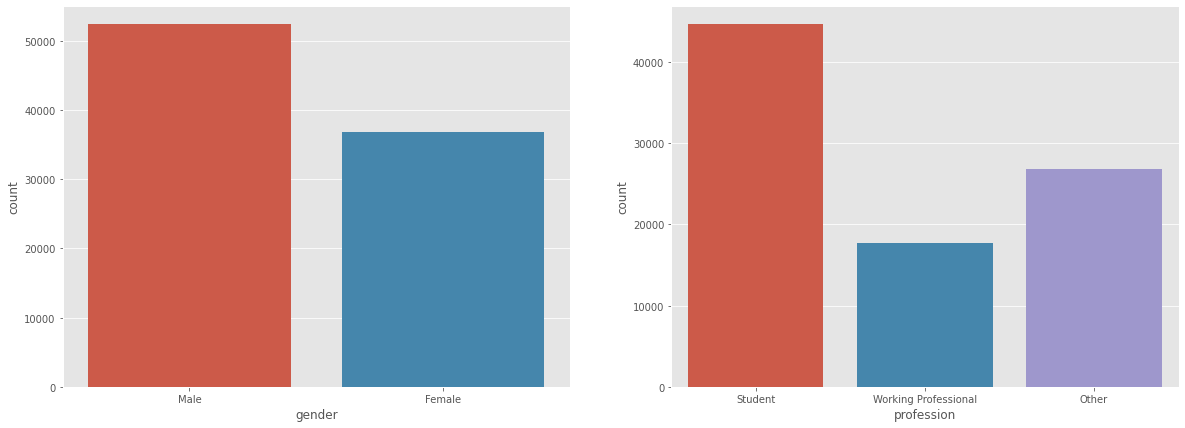

In [9]:
# how much repeat the gender and profession in the dataset


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.countplot(x='gender',data=df,ax=ax[0])
sns.countplot(x='profession',data=df,ax=ax[1])

plt.show()

- Inference: We have percent [Gender- Male = 58% , Female 42%] [ Professional - Student 50% , Other 30 % , Working Professional 20 % ]

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


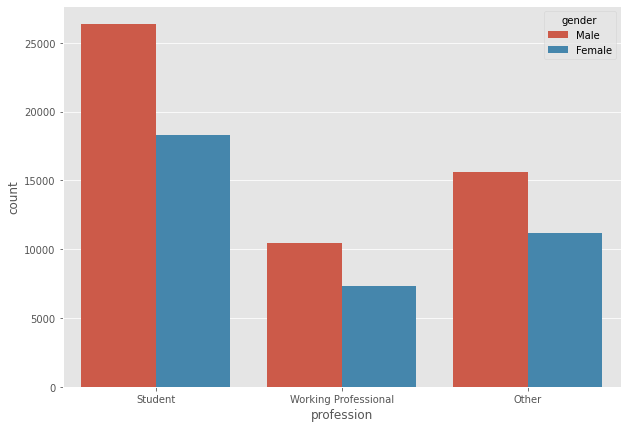

In [10]:
# how much repeat the profession and gender in the dataset

plt.figure(figsize=(10,7))
sns.countplot(df["profession"],hue=df["gender"])
plt.show()

- Inference: The highest percent students

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


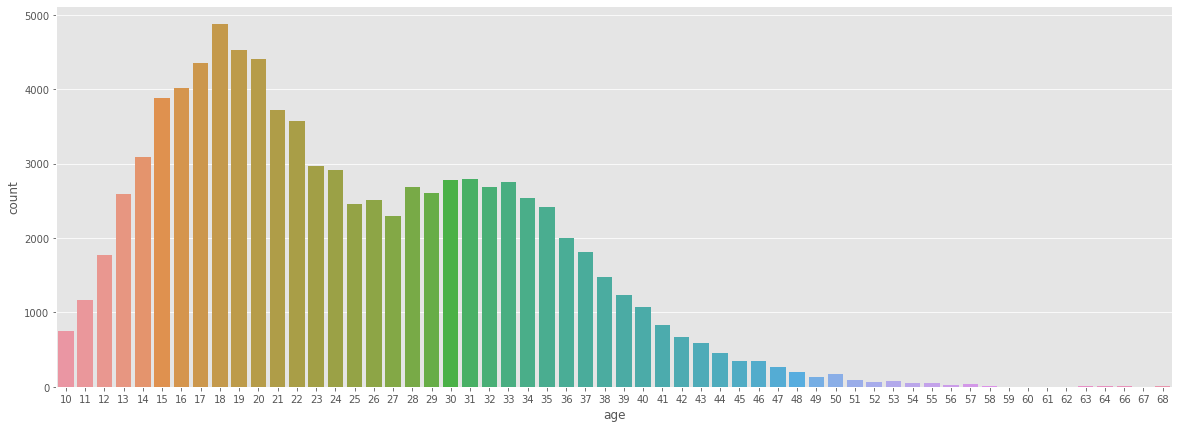

In [11]:
# how much repeat the Age in the dataset

plt.figure(figsize=(20,7))
sns.countplot(df["age"])
plt.show()

- Inference: The highest percent age [15 to 21 ] years

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


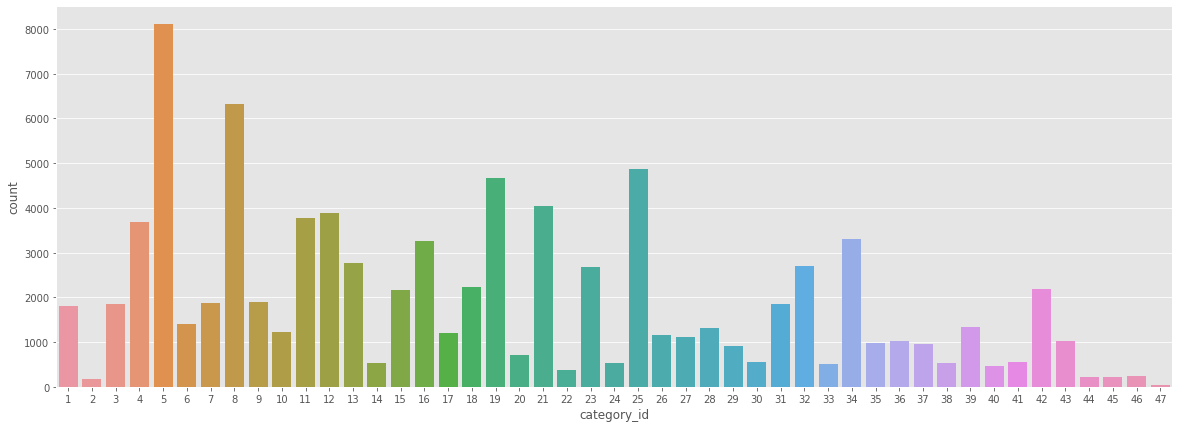

In [12]:
# how much repeat the category_id in the dataset

plt.figure(figsize=(20,7))
sns.countplot(df["category_id"])
plt.show()

- Inference: The highest percent Category ID = 5 Category

Text(0.5, 1.0, 'Comparing age with engagement score by the gender ')

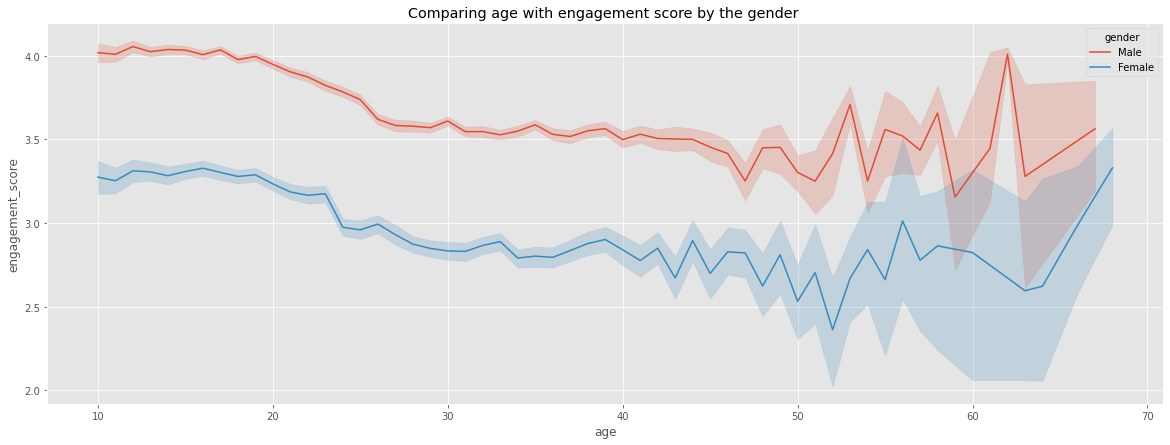

In [13]:
# Comparing age with engagement score by the gender 

plt.figure(figsize=(20,7))
sns.lineplot(data=df,x="age",y="engagement_score",hue="gender")
plt.title("Comparing age with engagement score by the gender ")

- Inference: The percent engagement score [ Category age 10 to 20 years the highest, also Category gender the male high than female ]

Text(0.5, 1.0, 'Comparing age with views by the gender ')

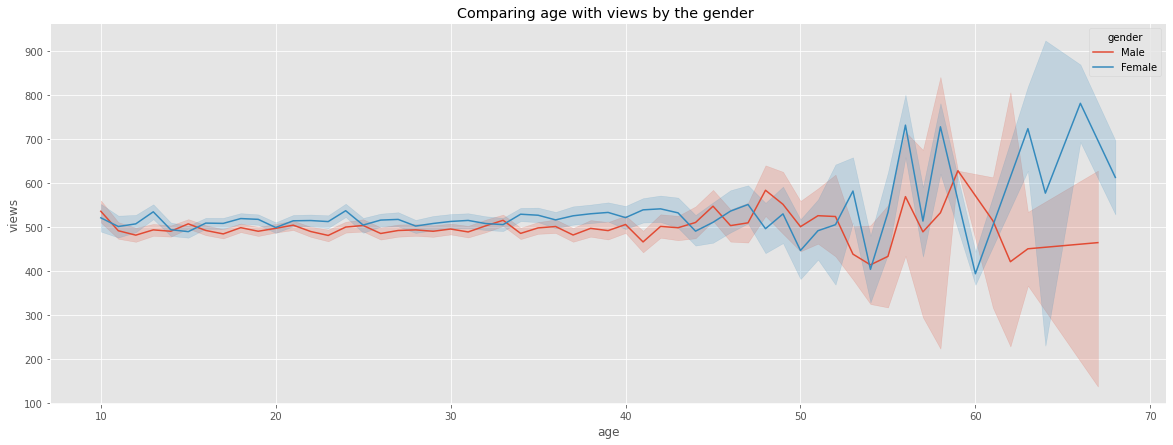

In [14]:
# Comparing age with views by the gender 

plt.figure(figsize=(20,7))
sns.lineplot(data=df,x="age",y="views",hue="gender")
plt.title("Comparing age with views by the gender ")

- Inference: The number of views is almost flat to the age of 40 between males and female , but the percentage changes after the age of 40 years

Text(0.5, 1.0, 'Comparing followers with views by the gender ')

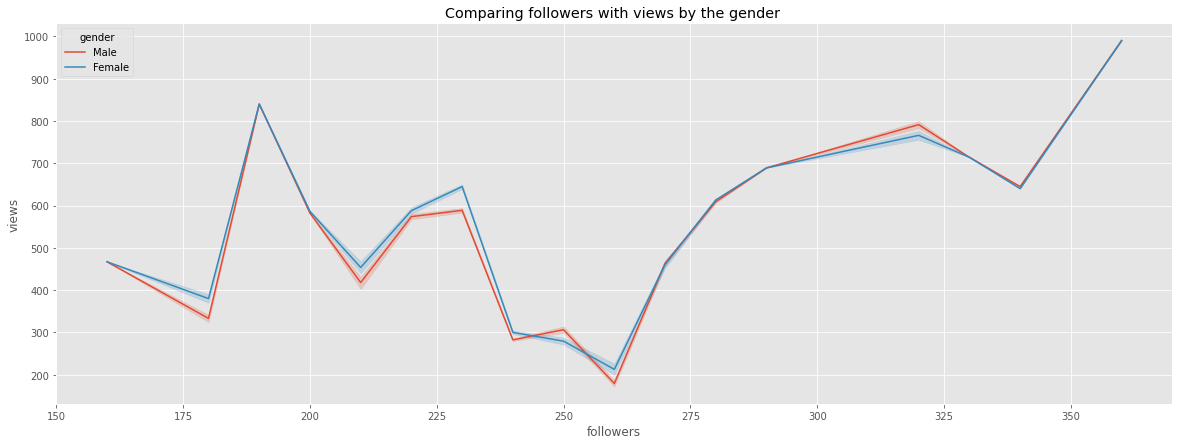

In [15]:
# Comparing followers with views by the gender 

plt.figure(figsize=(20,7))
sns.lineplot(data=df,x="followers",y="views",hue="gender")
plt.title("Comparing followers with views by the gender ")

- Inference: Comparing followers with views by the gender it's the same thing

Text(0.5, 1.0, 'Comparing followers with views by the gender ')

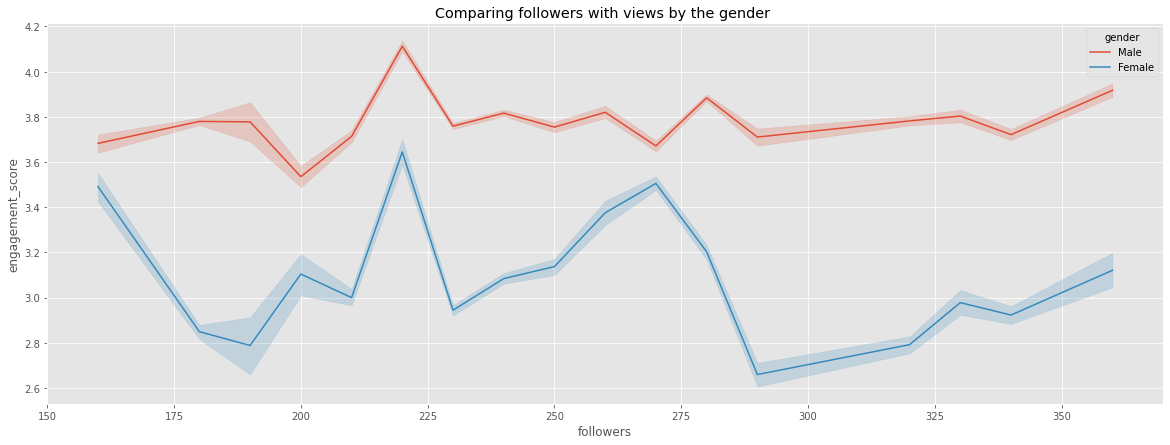

In [16]:
# Comparing followers with engagement score by the gender 


plt.figure(figsize=(20,7))
sns.lineplot(data=df,x="followers",y="engagement_score",hue="gender")
plt.title("Comparing followers with views by the gender ")

- Inference: Engagement score by the gender [ the male highest than female ]

In [17]:
#Inference: Interactive graph between the Age and Followers and Views by the Gender and Profession
    
px.scatter_3d(df,x="age",y="followers",z="views",color="gender",animation_frame="profession")

In [18]:
## group the to show how the average ["age","views","followers","engagement_score"] by the [ "profession","gender"]


avg= df.groupby(["profession","gender"])["age","views","followers","engagement_score"].mean().round(2)
avg

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



age   views  followers  engagement_score
profession           gender                                            
Other                Female  31.65  518.68     252.94              2.91
                     Male    31.67  494.04     252.73              3.63
Student              Female  17.82  509.86     251.97              3.32
                     Male    17.74  494.93     252.71              4.03
Working Professional Female  32.73  516.49     252.11              2.68
                     Male    32.09  498.33     252.02              3.39

<AxesSubplot:xlabel='profession,gender'>

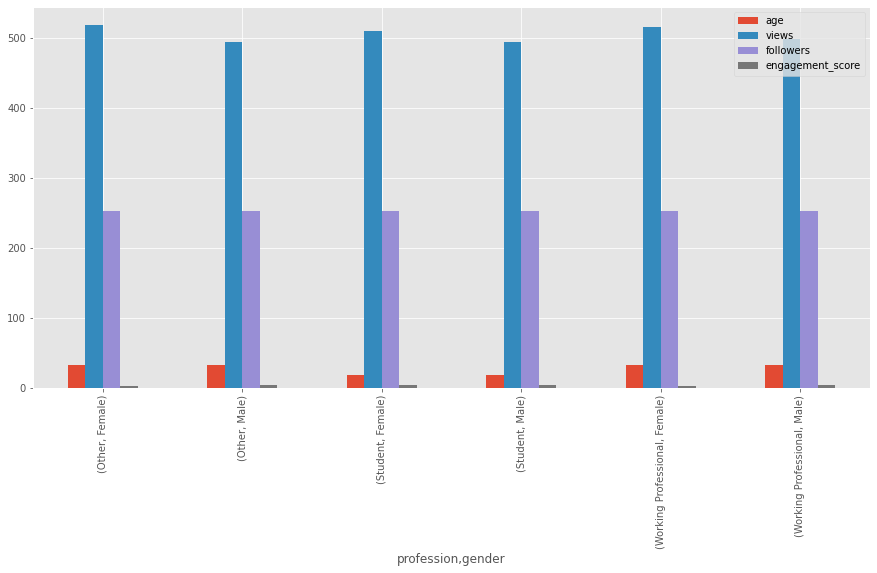

In [19]:
# Visualisation group by

avg.plot(kind="bar", figsize=(15,7))

- Inference: The average the same thing

# Analysis Results 😃😃😃😃

We have data about an online selling platform and we want to know the highest engagement score while analyzing this data through We have data about an online selling platform and we want to know the highest engagement score while analyzing this data through , User ID, Category ID, Video ID, Age, Gender, Profession, Followers, Views, Engagement Scor ID, Category ID, Video ID, Age, Gender, Profession, Followers, Views, Engagement Score

- We have percent [Gender- Male = 58% , Female 42%] [ Professional - Student 50% , Other 30 % , Working Professional 20 % ]

- The highest percent age [15 to 21 ] years

- The percent engagement score [ Category age 10 to 20 years the highest, also Category gender the male high than female ]

- The number of views is almost flat to the age of 40 between males and female , but the percentage changes after the age of 40 years

- Males use the platform more than females, the age period - teenage is the most used -, also the group of students the most used, perhaps the platform sells products for students.

- A high number of followers does not achieve a high viewership rate, and does not achieve a square rate in the Engagement score, perhaps using a fake follower count.



 
# 2 -Building a Machine Learning Model - Regression   🙄🙄🙄

In [20]:
#Importing the basic librarires for building model


from sklearn.linear_model import LinearRegression  ,BayesianRidge,HuberRegressor,ARDRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score

from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import StandardScaler ,PolynomialFeatures,minmax_scale,MaxAbsScaler ,LabelEncoder
from sklearn.neural_network import MLPRegressor

from sklearn.svm import SVR
from xgboost import XGBRegressor

In [21]:
df.head()

,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,19990,37,128,24,Male,Student,180,1000,4.33
1,5304,32,132,14,Female,Student,330,714,1.79
2,1840,12,24,19,Male,Student,180,138,4.35
3,12597,23,112,19,Male,Student,220,613,3.77
4,13626,23,112,27,Male,Working Professional,220,613,3.13


In [22]:
# Convert categories to numbers

df["Gender"]=pd.get_dummies(df["gender"],drop_first=True)

LE=LabelEncoder()
LE.fit(df["profession"])
df["Profession"]=LE.transform(df["profession"])

df.head() # show the data


,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score,Gender,Profession
0,19990,37,128,24,Male,Student,180,1000,4.33,1,1
1,5304,32,132,14,Female,Student,330,714,1.79,0,1
2,1840,12,24,19,Male,Student,180,138,4.35,1,1
3,12597,23,112,19,Male,Student,220,613,3.77,1,1
4,13626,23,112,27,Male,Working Professional,220,613,3.13,1,2


In [23]:
# drop the columns I don't need

df.drop(columns=["user_id","gender","profession"],inplace=True)

In [24]:
#Defined X value and y value , and split the data train

X = df.drop(columns="engagement_score")           
y = df["engagement_score"]    # y = quality

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (66897, 7)
X Test  :  (22300, 7)
Y Train :  (66897,)
Y Test  :  (22300,)


### Linear Model 🎉🎉🎉

In [25]:
# using the model Linear Regression

LinearRegression_model=LinearRegression(fit_intercept=True,normalize=False,copy_X=True, n_jobs=None)

# fit model

LinearRegression_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", LinearRegression_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", LinearRegression_model.score(X_test,y_test))

# Expected value Y using X test
y_pred_LR=LinearRegression_model.predict(X_test)

# Model Evaluation
print( " Model Evaluation Linear R : mean absolute error is ", mean_absolute_error(y_test,y_pred_LR))
print(" Model Evaluation Linear R : mean squared  error is " , mean_squared_error(y_test,y_pred_LR))
print(" Model Evaluation Linear R : median absolute error is " ,median_absolute_error(y_test,y_pred_LR)) 

print(" The Score Linear Regression " ,r2_score(y_test,y_pred_LR)) 

Score the X-train with Y-train is :  0.23674538453899463
Score the X-test  with Y-test  is :  0.23822100173308214
 Model Evaluation Linear R : mean absolute error is  0.5840101202777969
 Model Evaluation Linear R : mean squared  error is  0.5744668660063805
 Model Evaluation Linear R : median absolute error is  0.4598699672059341
 The Score Linear Regression  0.23822100173308214


- Inference : 23 % not working 😷😷😷

In [26]:
# using the model ARD Regression

ARDRegression_model=ARDRegression(n_iter=300,tol=0.001,alpha_1=1e-06,alpha_2=1e-06,lambda_1=1e-06,lambda_2=1e-06,compute_score=False,threshold_lambda=10000.0,
    fit_intercept=True,
    normalize=False,
    copy_X=True,
    verbose=False)

# fit model

ARDRegression_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", ARDRegression_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", ARDRegression_model.score(X_test,y_test))

# Expected value Y using X test
y_predARD=ARDRegression_model.predict(X_test)

# Model Evaluation
print( " Model Evaluation Linear R : mean absolute error is ", mean_absolute_error(y_test,y_predARD))
print(" Model Evaluation Linear R : mean squared  error is " , mean_squared_error(y_test,y_predARD))
print(" Model Evaluation Linear R : median absolute error is " ,median_absolute_error(y_test,y_predARD)) 

print(" The Score ARD Regression " ,r2_score(y_test,y_predARD)) 

Score the X-train with Y-train is :  0.22385258114389528
Score the X-test  with Y-test  is :  0.22441896575759923
 Model Evaluation Linear R : mean absolute error is  0.5886954824170019
 Model Evaluation Linear R : mean squared  error is  0.584875150258613
 Model Evaluation Linear R : median absolute error is  0.46254594846047503
 The Score ARD Regression  0.22441896575759923


- Inference : 22 % not working 😷😷😷

### Decision Tree Regressor Model 🎉🎉🎉

In [27]:
# using the Decision Tree Regressor Model

DecisionTreeRegressor_model=DecisionTreeRegressor(criterion='mse',splitter='best',max_depth=None,min_samples_split=2,min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    presort='deprecated',
    ccp_alpha=0.0)

# fit model

DecisionTreeRegressor_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", DecisionTreeRegressor_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", DecisionTreeRegressor_model.score(X_test,y_test))

# Expected value Y using X test
y_predDTR=DecisionTreeRegressor_model.predict(X_test)

# Model Evaluation

print(" The Score Decision Tree Regressor model " ,r2_score(y_test,y_predDTR)) 

Score the X-train with Y-train is :  0.5515758049596611
Score the X-test  with Y-test  is :  0.13564992422643474
 The Score Decision Tree Regressor model  0.13564992422643474


- Inference : 13 % not working 😷😷😷

### K Neighbors Regressor 🎉🎉🎉

In [28]:
# using the K Neighbors Regressor Model

KNeighborsRegressor_model=KNeighborsRegressor(n_neighbors=5,weights='uniform',algorithm='auto',leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None)

# fit model

KNeighborsRegressor_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", DecisionTreeRegressor_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", DecisionTreeRegressor_model.score(X_test,y_test))

# Expected value Y using X test
y_predKN=KNeighborsRegressor_model.predict(X_test)

# Model Evaluation

print(" The Score K Neighbors Regressor Model " ,r2_score(y_test,y_predKN)) 

Score the X-train with Y-train is :  0.5515758049596611
Score the X-test  with Y-test  is :  0.13564992422643474
 The Score K Neighbors Regressor Model  0.21627302170390683


- Inference : 21 % not working 😷😷😷

### Random Forest Regressor 🎉🎉🎉

In [29]:
# using the Random Forest Regressor Model

RandomForestRegressor_model=RandomForestRegressor(n_estimators=100,criterion='mse',max_depth=None,min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False)

# fit model

RandomForestRegressor_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", RandomForestRegressor_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", RandomForestRegressor_model.score(X_test,y_test))

# Expected value Y using X test
y_predRFR=RandomForestRegressor_model.predict(X_test)

# Model Evaluation

print(" The Score Random Forest Regressor Model " ,r2_score(y_test,y_predRFR)) 

Score the X-train with Y-train is :  0.5383916209681092
Score the X-test  with Y-test  is :  0.22994091770480307
 The Score Random Forest Regressor Model  0.22994091770480307


Inference : 23 % not working 😷😷😷

### MLP Regressor Model  🎉🎉🎉

In [30]:
# using the MLP Regressor Model

MLPRegressor_model=MLPRegressor()

# fit model

MLPRegressor_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", MLPRegressor_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", MLPRegressor_model.score(X_test,y_test))

# Expected value Y using X test
y_predMLP=MLPRegressor_model.predict(X_test)

# Model Evaluation

print(" The Score MLP Regressor Model " ,r2_score(y_test,y_predMLP)) 

Score the X-train with Y-train is :  0.14100063403592866
Score the X-test  with Y-test  is :  0.1494148034288757
 The Score MLP Regressor Model  0.1494148034288757


- Inference : 25 % not working 😷😷😷

### SVR Model  🎉🎉🎉

In [31]:
# using the SVR-  Regressor Model

svr_model=SVR()

# fit model

svr_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", svr_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", svr_model.score(X_test,y_test))

# Expected value Y using X test
y_predsvr=svr_model.predict(X_test)

# Model Evaluation

print(" The Score SVR  Model " ,r2_score(y_test,y_predsvr)) 

Score the X-train with Y-train is :  0.07630763173093458
Score the X-test  with Y-test  is :  0.07753828255562223
 The Score SVR  Model  0.07753828255562223


- Inference : 7 % not working 😷😷😷

### XGB Regressor  🎉🎉🎉

In [32]:
# using the XGB Regressor Model

XGB_model=XGBRegressor(n_estimators=35,max_depth=7,min_child_weight=1,subsample=1,colsample_bytree=1,
                   learning_rate=0.18)

# fit model

XGB_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", XGB_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", XGB_model.score(X_test,y_test))

# Expected value Y using X test
y_predXGB=XGB_model.predict(X_test)

# Model Evaluation

print(" The Score XGB Regressor  Model " ,r2_score(y_test,y_predXGB)) 

Score the X-train with Y-train is :  0.3848928646806534
Score the X-test  with Y-test  is :  0.35945747386392535
 The Score XGB Regressor  Model  0.35945747386392535


- Inference : 35 % not working 😷😷😷

# Model Selection Results 😃😃😃😃

- The Score Linear Regression 23 %

- The Score ARD Regression 22 %

- The Score Decision Tree Regressor model 13 %

- The Score K Neighbors Regressor Model 21 %

- The Score Random Forest Regressor Model 23 %

- The Score MLP Regressor Model -13 %

- The Score SVR Model 7 %

- The Score XGB Regressor Model 36 %

## All models are not working high - low score

### But now I will complete a model - XGB Regressor
### And , waiting for the update my notebook

In [33]:
# import data test

df_test=pd.read_csv("../input/online-content-sharing-platform/Test.csv")
df_test.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840


In [34]:
# making process about the data test

df_test["Gender"]=pd.get_dummies(df_test["gender"],drop_first=True)

q=LabelEncoder()
q.fit(df_test["profession"])
df_test["Profession"]=q.transform(df_test["profession"])


df_test.drop(columns=["row_id","user_id","gender","profession"],inplace=True)

df_test.head()

,category_id,video_id,age,followers,views,Gender,Profession
0,12,42,14,180,138,1,1
1,34,115,14,230,840,1,1
2,8,110,44,280,628,0,2
3,16,137,18,270,462,1,1
4,34,96,47,230,840,0,0


In [35]:
# Expected value Y using X test

final =XGB_model.predict(df_test) #predict
df_test["Score"]=final  #now column - predict Score

df_test.head()

,category_id,video_id,age,followers,views,Gender,Profession,Score
0,12,42,14,180,138,1,1,4.098092
1,34,115,14,230,840,1,1,3.685174
2,8,110,44,280,628,0,2,2.744809
3,16,137,18,270,462,1,1,3.858700
4,34,96,47,230,840,0,0,2.773338


In [36]:
#Create submission file
# df_test.to_csv('final_test_data.csv',index=False)

# Notes

- Thank for reading my analysis and my regression.
- If you any questions or advice me please write in the comment .
- If anyone has a model with a higher percentage, please tell me
- I will do an update my notebook - soon , I know this model not working 35 %

# Vote
- If you liked my work vote me ,

# The End